In [5]:
#data for just 15 patients

import os

input_dir = "/data/all/train/images/"
target_dir = "/data/all/train/masks/"
img_size = (512, 512)
num_classes = 1 # change this
batch_size = 24 # changed to 12 from 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".npz")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".npz") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 208837
/data/all/train/images/img_LIDC-IDRI-0001_0.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_0.npz
/data/all/train/images/img_LIDC-IDRI-0001_1.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_1.npz
/data/all/train/images/img_LIDC-IDRI-0001_10.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_10.npz
/data/all/train/images/img_LIDC-IDRI-0001_100.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_100.npz
/data/all/train/images/img_LIDC-IDRI-0001_101.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_101.npz
/data/all/train/images/img_LIDC-IDRI-0001_102.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_102.npz
/data/all/train/images/img_LIDC-IDRI-0001_103.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_103.npz
/data/all/train/images/img_LIDC-IDRI-0001_104.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_104.npz
/data/all/train/images/img_LIDC-IDRI-0001_105.npz | /data/all/train/masks/mask_LIDC-IDRI-0001_105.npz
/data/all/train/images/img_LIDC-IDRI-0001_106.npz | /data/all/trai

In [67]:
!mkdir -p /data/sample/image

In [18]:
!mkdir -p /data/sample/mask

In [19]:
# from IPython.display 
# import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import Image
from PIL import ImageOps
arr = np.load('/data/small/train/image/0-0.npy')[:,:,0]
rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
im = Image.fromarray(rescaled)
#im = Image.fromarray(arr[:,:,0]*255)
im.save('/data/sample/image/'+'sample_image'+'.tif')

#mask

arr = np.load('/data/small/train/mask/0-0.npy')[:,:,0]
rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
im = Image.fromarray(rescaled)
#im = Image.fromarray(arr[:,:,0]*255)
im.save('/data/sample/mask/'+'sample_image'+'.tif')

/tmp/ipykernel_453/3064446872.py:17: RuntimeWarning: divide by zero encountered in true_divide
  rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
/tmp/ipykernel_453/3064446872.py:17: RuntimeWarning: invalid value encountered in multiply
  rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)


/tmp/ipykernel_453/1119451967.py:2: RuntimeWarning: divide by zero encountered in true_divide
  rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
/tmp/ipykernel_453/1119451967.py:2: RuntimeWarning: invalid value encountered in multiply
  rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)


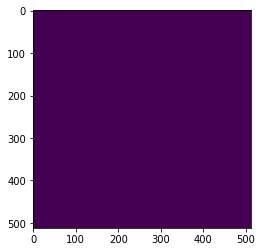

In [25]:
arr = np.load('/data/small/train/mask/0-0.npy')[:,:,0]
rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
im = Image.fromarray(rescaled)
plt.imshow(im)

In [26]:
np.unique(im)

array([0], dtype=uint8)

In [2]:
!pip install Pillow

     |████████████████████████████████| 3.0 MB 6.3 MB/s eta 0:00:01


In [3]:
!pip install matplotlib

     |████████████████████████████████| 10.3 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 61.9 MB/s eta 0:00:01


In [6]:
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import Image
from PIL import ImageOps

2021-10-05 15:47:23.839300: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0


In [3]:
ls /data/sample/image/

sample_image.tif


In [20]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
seed = 100 # (IMPORTANT) to transform image and corresponding mask with same augmentation parameter.

train_image_datagen = ImageDataGenerator() # custom fuction for each image you can use resnet one too.
train_mask_datagen = ImageDataGenerator()  # to make mask as feedable formate (256,256,1)

val_image_datagen = ImageDataGenerator()
val_image_datagen = ImageDataGenerator()

train_image_generator = train_image_datagen.flow_from_directory("/data/sample/",
                                                                class_mode=None, 
                                                                seed=seed, 
                                                                color_mode='grayscale',
                                                                # target_size=(512, 512),
                                                                batch_size=64,
                                                                # subset = 'training'
                                                               )
train_image_generator = train_image_datagen.flow_from_directory("/data/sample/",
                                                                class_mode=None, 
                                                                seed=seed, 
                                                                color_mode='grayscale',
                                                                # target_size=(512, 512),
                                                                batch_size=64,
                                                                # subset = 'training'
                                                               )

Found 2 images belonging to 2 classes.


In [23]:
train_image_generator[0]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

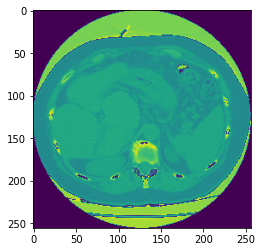

In [11]:
plt.imshow(train_image_generator[0][0])

In [12]:
np.unique(train_image_generator[0][0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# def normalize(input_image, input_mask):
#     input_image = tf.cast(input_image, tf.float32) / 255.0
#     input_mask -= 1
#     return input_image, input_mask

In [14]:
# for npy files
# def load_image(imagepath, maskpath):
#     image = np.load(imagepath).astype('float32')
# #     image -= np.mean(image)
# #     image /= np.std(image)
#     # we will encounter divide by zero
#     image = ((image - (image.min()+1)) * (1/((image.max() - image.min() + 1)) * 255)).astype('uint8')
#     image = image.astype('float32')
#     mask = np.load(maskpath).astype('float32')
#     return image, mask

In [15]:
def load_image(imagepath, maskpath):
    image = np.load(imagepath)['arr_0'].astype('float32')
#     image -= np.mean(image)
#     image /= np.std(image)
    # we will encounter divide by zero
    image = ((image - (image.min()+1)) * (1/((image.max() - image.min() + 1)) * 255)).astype('uint8')
    image = image.astype('float32')
    mask = np.load(maskpath)['arr_0'].astype('float32')
    return image, mask

In [16]:
def display(img, mask):
    f, a = plt.subplots(1,2)
    a[0].imshow(img)
    a[1].imshow(mask)

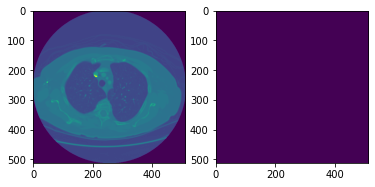

In [17]:
img, mask = load_image(input_img_paths[9], target_img_paths[9])
display(img, mask)

In [73]:
np.unique(mask)

array([0.], dtype=float32)

In [13]:
mask.shape

(512, 512, 1)

In [14]:
mask

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=int16)

#### Another way to convert the image to 0-255 range

In [115]:
from PIL import Image

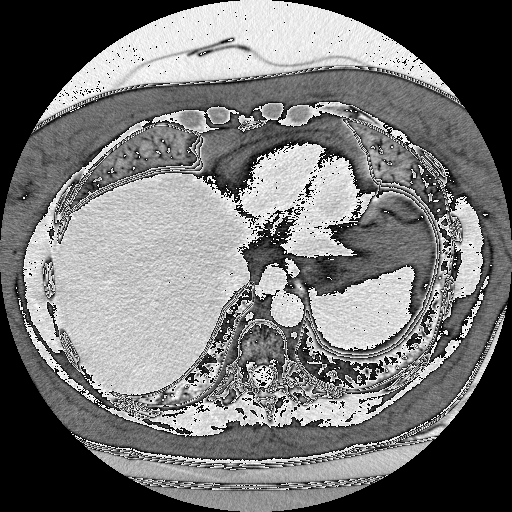

In [96]:
#Image.fromarray(img.numpy()[:,:,0])
tmp_arr = np.load(input_img_paths[9])[:,:,0]
z = (tmp_arr * 255).astype(np.uint8)
Image.fromarray(z)

In [98]:
np.unique(z)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

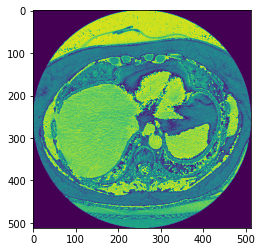

In [99]:
plt.imshow(z)

In [100]:
z = z.astype(np.float32)
np.unique(z)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [113]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            #img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            img, msk = load_image(path, path)
            #x[j] = np.expand_dims(img, 2)
            x[j] = img/255.0
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="float32")
        for j, path in enumerate(batch_target_img_paths):
            #img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            img, msk = load_image(path, path)
            #y[j] = np.expand_dims(img, 2)
            y[j] = msk/255.0
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
#             y[j] -= 1
#             y1 = y[j] < 1
#             y[j] = y1.astype(int)
        return x, y

In [114]:
import random

# Split our img paths into a training and a validation set
num_samples = len(input_img_paths)
#val_samples = 1000
frac = 0.7
idxs = np.arange(num_samples)
random.Random(1337).shuffle(idxs)
random.Random(1337).shuffle(idxs)
train_input_img_paths = np.array(input_img_paths)[idxs][:int(num_samples * frac)]
train_target_img_paths = np.array(target_img_paths)[idxs][:int(num_samples * frac)]
val_input_img_paths = np.array(input_img_paths)[idxs][int(num_samples * frac):]
val_target_img_paths = np.array(target_img_paths)[idxs][int(num_samples * frac):]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [115]:
# import random

# # Split our img paths into a training and a validation set
# val_samples = 1000
# idxs = np.arange(len(input_img_paths))
# random.Random(1337).shuffle(idxs)
# random.Random(1337).shuffle(idxs)
# train_input_img_paths = np.array(input_img_paths)[idxs][:-val_samples]
# train_target_img_paths = np.array(target_img_paths)[idxs][:-val_samples]
# val_input_img_paths = np.array(input_img_paths)[idxs][-val_samples:]
# val_target_img_paths = np.array(target_img_paths)[idxs][-val_samples:]

# # Instantiate data Sequences for each split
# train_gen = OxfordPets(
#     batch_size, img_size, train_input_img_paths, train_target_img_paths
# )
# val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [116]:
i, m = train_gen[0]
m[0]

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [19]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (1,)) #change to 1 from 3

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    #outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)
    outputs = layers.Conv2D(num_classes, 1, activation="sigmoid", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
mirrored_strategy = tf.distribute.MirroredStrategy()
# Build model
with mirrored_strategy.scope():
# Build model
    model = get_model(img_size, num_classes)
model.summary()

2021-10-05 15:54:56.488537: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcuda.so.1
2021-10-05 15:54:56.992212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 15:54:56.992957: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-10-05 15:54:56.993096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 15:54:56.993772: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 1 with properties: 
pciBusID: 0000:00:05.0 na

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensor

In [20]:
input_img_paths[:5]

['/data/all/train/images/img_LIDC-IDRI-0001_0.npz',
 '/data/all/train/images/img_LIDC-IDRI-0001_1.npz',
 '/data/all/train/images/img_LIDC-IDRI-0001_10.npz',
 '/data/all/train/images/img_LIDC-IDRI-0001_100.npz',
 '/data/all/train/images/img_LIDC-IDRI-0001_101.npz']

In [21]:
target_img_paths[:5]

['/data/all/train/masks/mask_LIDC-IDRI-0001_0.npz',
 '/data/all/train/masks/mask_LIDC-IDRI-0001_1.npz',
 '/data/all/train/masks/mask_LIDC-IDRI-0001_10.npz',
 '/data/all/train/masks/mask_LIDC-IDRI-0001_100.npz',
 '/data/all/train/masks/mask_LIDC-IDRI-0001_101.npz']

In [22]:
print(num_samples)

NameError: name 'num_samples' is not defined

In [85]:
len(val_input_img_paths)

764

In [118]:
inp, tar = train_gen[0]

In [119]:
inp.shape

(24, 512, 512, 1)

In [120]:
tar.shape

(24, 512, 512, 1)

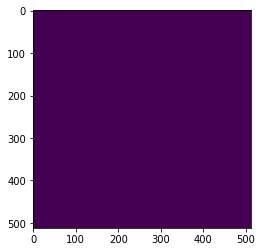

In [121]:
plt.imshow(tar[0])

In [122]:
inp.dtype

dtype('float32')

In [123]:
tar.shape

(24, 512, 512, 1)

In [124]:
tar.dtype

dtype('float32')

In [125]:
preds = model(inp)

In [126]:
preds[0].shape

TensorShape([512, 512, 1])

In [127]:
preds[0]

<tf.Tensor: shape=(512, 512, 1), dtype=float32, numpy=
array([[[0.5005577 ],
        [0.5005577 ],
        [0.5002118 ],
        ...,
        [0.4997916 ],
        [0.49973413],
        [0.49973413]],

       [[0.5005577 ],
        [0.5005577 ],
        [0.5002118 ],
        ...,
        [0.4997916 ],
        [0.49973413],
        [0.49973413]],

       [[0.5003062 ],
        [0.5003062 ],
        [0.5002351 ],
        ...,
        [0.500022  ],
        [0.49996543],
        [0.49996543]],

       ...,

       [[0.5005706 ],
        [0.5005706 ],
        [0.5008356 ],
        ...,
        [0.500751  ],
        [0.50064886],
        [0.50064886]],

       [[0.5001035 ],
        [0.5001035 ],
        [0.50046116],
        ...,
        [0.5006358 ],
        [0.5007722 ],
        [0.5007722 ]],

       [[0.5001035 ],
        [0.5001035 ],
        [0.50046116],
        ...,
        [0.5006358 ],
        [0.5007722 ],
        [0.5007722 ]]], dtype=float32)>

In [128]:
#loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
loss = tf.keras.losses.categorical_crossentropy(tar[0], preds[0])
loss.numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [129]:
np.sum(loss.numpy())

0.0

In [102]:
tar[0].shape

(512, 512, 1)

In [99]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
assert loss.shape == (2,)
loss.numpy()

array([0.05129331, 2.3025851 ], dtype=float32)

In [28]:
print(train_input_img_paths[:5])
train_target_img_paths[:5]

['/data/small/train/image/9-122.npy' '/data/small/train/image/3-17.npy'
 '/data/small/train/image/1-111.npy' '/data/small/train/image/14-25.npy'
 '/data/small/train/image/10-280.npy']


array(['/data/small/train/mask/9-122.npy',
       '/data/small/train/mask/3-17.npy',
       '/data/small/train/mask/1-111.npy',
       '/data/small/train/mask/14-25.npy',
       '/data/small/train/mask/10-280.npy'], dtype='<U33')

In [130]:
#model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
model.compile(optimizer="rmsprop", loss="binary_crossentropy")
#model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]

In [131]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

# callbacks = [
#     keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
# ]

# Train the model, doing validation at the end of each epoch.
epochs = 25
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

2021-10-04 07:57:17.327473: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:695] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_150957"
    }
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  k

Epoch 1/25
INFO:tensorflow:batch_all_reduce: 82 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 82 all-reduces with algorithm = nccl, num_packs = 1
74/74 [==============================] - ETA: 0s - loss: 0.0748

2021-10-04 07:58:30.091655: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:695] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_168762"
    }
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  k

74/74 [==============================] - 81s 901ms/step - loss: 0.0748 - val_loss: 1.1011e-05
Epoch 2/25
74/74 [==============================] - 64s 869ms/step - loss: 3.4155e-04 - val_loss: 1.1703e-05
Epoch 3/25
74/74 [==============================] - 64s 858ms/step - loss: 1.8196e-05 - val_loss: 1.0561e-05
Epoch 4/25
74/74 [==============================] - 63s 853ms/step - loss: 1.7397 - val_loss: 3.1828e-05
Epoch 5/25
 9/74 [==>...........................] - ETA: 50s - loss: 7.0798e-05

KeyboardInterrupt: 

In [31]:
!pip install pydicom
!pip install pylidc

     |████████████████████████████████| 2.0 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 30.2 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 67.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 73.5 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 84.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 65.5 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 47.1 MB/s eta 0:00:01


In [32]:
import pylidc as pl
from pylidc.utils import consensus
import pydicom as dicom
from skimage.measure import find_contours
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data_folder = '/data/downloaded_small_lidc_sorted/'
#f = open ('.pylidcrc','w')            #For GCP
f = open ('/root/.pylidcrc','w')    #For Colab
f.write('[dicom]'+'\n')
f.write('path =' + data_folder +'\n')
f.write('warn = True')
f.close()

In [111]:
mask_pre

array([[3.5212745e-04, 3.5212745e-04, 5.2940864e-05, ..., 1.1753138e-05,
        9.3000650e-05, 9.3000650e-05],
       [3.5212745e-04, 3.5212745e-04, 5.2940864e-05, ..., 1.1753138e-05,
        9.3000650e-05, 9.3000650e-05],
       [1.3751560e-05, 1.3751560e-05, 1.5107705e-06, ..., 4.0254326e-07,
        1.5451482e-05, 1.5451482e-05],
       ...,
       [1.6104641e-04, 1.6104641e-04, 9.0047761e-06, ..., 8.9988873e-07,
        1.2533537e-04, 1.2533537e-04],
       [7.5968872e-03, 7.5968872e-03, 2.0687012e-03, ..., 2.8481893e-04,
        5.2317493e-03, 5.2317493e-03],
       [7.5968872e-03, 7.5968872e-03, 2.0687012e-03, ..., 2.8481893e-04,
        5.2317493e-03, 5.2317493e-03]], dtype=float32)

Current patient ID = LIDC-IDRI-0086
Loading dicom files ... This may take a moment.


2021-10-04 08:02:04.262546: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:695] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_173483"
    }
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset. You can do this by creating a new `tf.data.Options()` object then setting `options.experimental_distribute.auto_shard_policy = Aut

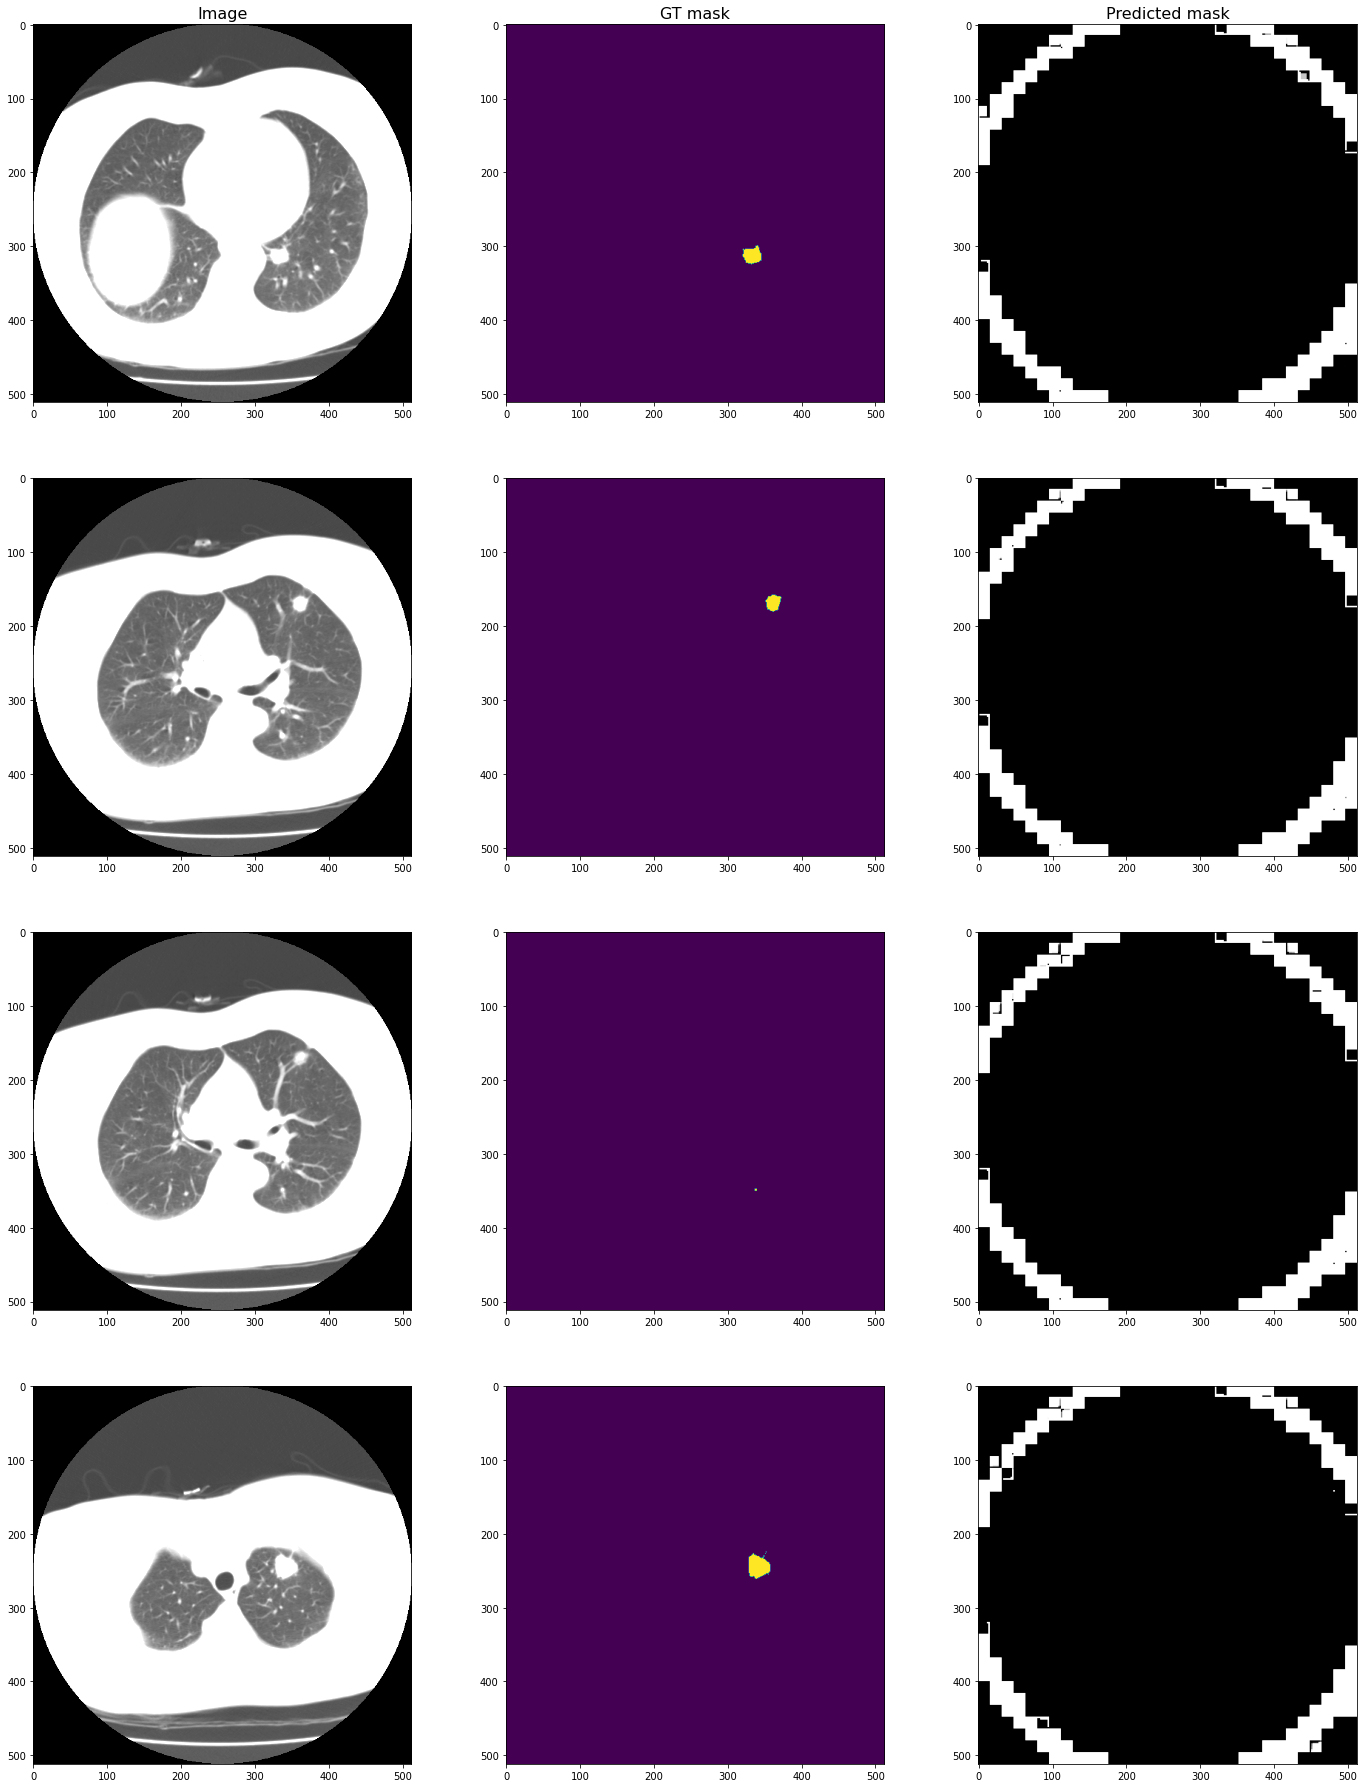

2021-10-04 08:03:47.445282: W tensorflow/core/framework/op_kernel.cc:1755] Invalid argument: ValueError: callback pyfunc_26 is not found
Traceback (most recent call last):

  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_26 is not found


2021-10-04 08:03:47.445534: W tensorflow/core/kernels/data/generator_dataset_op.cc:107] Error occurred when finalizing GeneratorDataset iterator: Invalid argument: ValueError: callback pyfunc_26 is not found
Traceback (most recent call last):

  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_26 is not found


	 [[{{node PyFunc}}]]
Exception ignored in: <function Pool.__del__ at 0x7f51d8d6f4c0>
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessi

In [132]:
%matplotlib inline

cohort = data_folder
patient_list = os.listdir(cohort)
patient_select = 0

print ("Current patient ID =", patient_list[patient_select])

scan = pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(patient_list))
nodules_annotation = scan[patient_select].cluster_annotations()
vol = scan[patient_select].to_volume()

cmask_CT = []
cbbox_CT = []
masks_CT = []
for nodule_idx, nodule in enumerate(nodules_annotation):
    cmask, cbbox, masks = consensus(nodule)
    cmask_CT.append(cmask)
    cbbox_CT.append(cbbox)
    masks_CT.append(masks)   

nodule_num = len(cmask_CT)
plt.figure(figsize=(8*3,8*nodule_num))
for i in range(nodule_num):
    cmask = cmask_CT[i]
    cbbox = cbbox_CT[i]
    masks = masks_CT[i]
    k = int(0.5*(cbbox[2].stop - cbbox[2].start))
    k_slice = k + cbbox[2].start
    plt.subplot(nodule_num,3,1+i*3)
    plt.imshow(vol[:,:,k_slice],cmap='gray')
    plt.clim(vmin=-1350,vmax=-150)
    if i==0:
        plt.title('Image',fontsize=16)
    
    plt.subplot(nodule_num,3,2+i*3)
    CT_mask = np.zeros_like(vol)
    CT_mask[cbbox] = cmask
    plt.imshow(CT_mask[:,:,k_slice])
    if i==0:
        plt.title('GT mask',fontsize=16)

    plt.subplot(nodule_num,3,3+i*3)
    image = vol[:,:,k_slice].astype('float32')
    image = ((image - (image.min()+1)) * (1/((image.max() - image.min() + 1)) * 255)).astype('uint8')
    image = image.astype('float32')
#     image -= np.mean(image)
#     image /= np.std(image)
#     image = torch.from_numpy(image[np.newaxis,np.newaxis,:]).to(device)
#     mask_pre = torch.sigmoid(model(image)).detach().cpu().numpy()
    mask_pre = model.predict(image[np.newaxis,:,:, np.newaxis])
    mask_pre = np.squeeze(mask_pre)
  #  print(np.max(mask_pre), np.min(mask_pre))
  #  print(np.max(CT_mask[:,:,k_slice]), np.min(CT_mask[:,:,k_slice]))
    #mask_pre = np.where(mask_pre>0.5, 1,0)
    plt.imshow(mask_pre, cmap='Greys_r')
    if i==0:
        plt.title('Predicted mask',fontsize=16)

In [29]:
image = vol[:,:,k_slice].astype('float32')
image = ((image - (image.min()+1)) * (1/((image.max() - image.min() + 1)) * 255)).astype('uint8')
image = image.astype('float32')
#mask = np.load(maskpath)
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
np.unique(image)

array([  0.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
       176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 204., 205., 206., 207., 208.,
       209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219.,
       220., 221., 222., 223., 224., 225., 226., 22

In [27]:
image.shape

(512, 512)

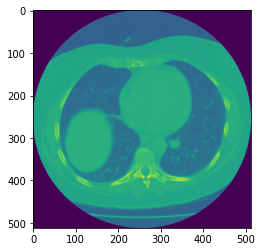

In [26]:
plt.imshow(image)

In [63]:
image = vol[:,:,k_slice].astype('float32')
image = ((image - (image.min()+1)) * (1/((image.max() - image.min() + 1)) * 255)).astype('uint8')
image = image.astype('float32')
image = image[np.newaxis, :,:, np.newaxis]
pred = model(image)

In [64]:
pred

<tf.Tensor: shape=(1, 512, 512, 2), dtype=float32, numpy=
array([[[[3.79770868e-12, 1.00000000e+00],
         [1.93751970e-09, 1.00000000e+00],
         [4.92771068e-09, 1.00000000e+00],
         ...,
         [9.42298506e-09, 1.00000000e+00],
         [3.61023433e-09, 1.00000000e+00],
         [4.51825690e-05, 9.99954820e-01]],

        [[7.91259473e-13, 1.00000000e+00],
         [8.42119334e-06, 9.99991536e-01],
         [2.16735316e-05, 9.99978304e-01],
         ...,
         [7.43502093e-10, 1.00000000e+00],
         [2.29196453e-10, 1.00000000e+00],
         [7.45517013e-07, 9.99999285e-01]],

        [[7.59974982e-13, 1.00000000e+00],
         [9.31704017e-06, 9.99990702e-01],
         [2.50468129e-05, 9.99974966e-01],
         ...,
         [1.49245760e-09, 1.00000000e+00],
         [3.50625917e-10, 1.00000000e+00],
         [1.00113539e-06, 9.99999046e-01]],

        ...,

        [[1.75847428e-13, 1.00000000e+00],
         [4.10177876e-07, 9.99999642e-01],
         [1.10402289

In [65]:
pred.shape

TensorShape([1, 512, 512, 2])

In [66]:
mask = np.argmax(pred[0], axis=-1)
mask = np.expand_dims(mask, axis=-1)

In [67]:
from PIL import Image
import PIL
from PIL import ImageOps
from IPython.display import Image, display

In [68]:
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))

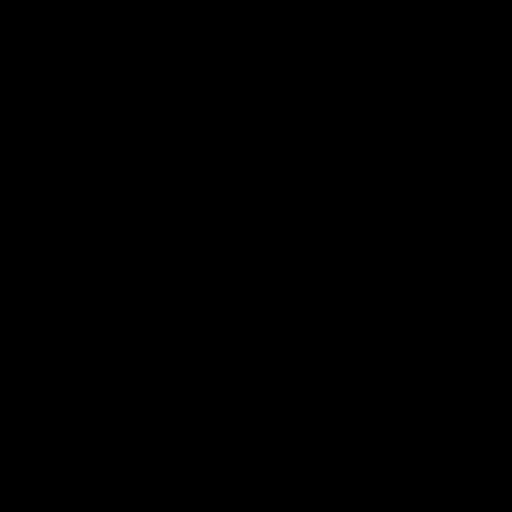

In [69]:
display(img)